In [6]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from finite_volume.advection import AdvectionSolver
from configs import problem_configs, solver_config
from utils import pd_xlsx_write

In [29]:
limiter_configs = {
    "a priori MD": dict(
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
    ),
    "a priori LD": dict(
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        SED=True,
    ),
    "a posteriori LD": dict(
        aposteriori_limiting=True,
        fallback_limiter="moncen",
        courant=0.8,
        SED=True,
    ),
    "a posteriori MD": dict(
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        convex=True,
        courant=0.8,
        SED=True,
    ),
}

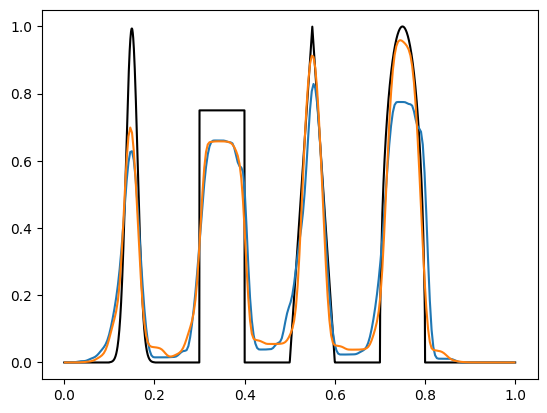

In [38]:
fig, axs = plt.subplots()

n = 256
p = 7
num_snapshots, snapshot_dt = 100, 1.0

high_res_solver = AdvectionSolver(
    n=2048,
    **problem_configs["composite"],
)
high_res_solver.plot_slice(axs, color="black")

apriori_MD_solver = AdvectionSolver(
    n=n,
    order=p + 1,
    **limiter_configs["a priori MD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["composite"],
    **solver_config,
)
apriori_MD_solver.rkorder()
apriori_MD_solver.plot_slice(axs)

aposteriori_MD_solver = AdvectionSolver(
    n=n,
    order=p + 1,
    **limiter_configs["a posteriori MD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["composite"],
    **solver_config,
)
aposteriori_MD_solver.rkorder()
aposteriori_MD_solver.plot_slice(axs)

# aposteriori_LD_solver = AdvectionSolver(
#     n=n,
#     order=p + 1,
#     **limiter_configs["a posteriori LD"],
#     num_snapshots=num_snapshots,
#     snapshot_dt=snapshot_dt,
#     **problem_configs["composite"],
#     **solver_config,
# )
# aposteriori_LD_solver.rkorder()
# aposteriori_LD_solver.plot_slice(axs)

In [41]:
limiter_configs = {
    "a priori MD": dict(
        flux_strategy="gauss-legendre",
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
    ),
    "a priori LD": dict(
        flux_strategy="transverse",
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        SED=True,
    ),
    "a posteriori LD": dict(
        flux_strategy="transverse",
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        courant=0.8,
        SED=True,
    ),
    "a posteriori MD": dict(
        flux_strategy="transverse",
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        hancock=True,
        convex=True,
        courant=0.8,
        SED=True,
    ),
}

New solution instance...


100%|██████████| 100.0/100.0 [19:41]                



Wrote a solution up to t = 100.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_100_(2, 1)_0.8_8_t_F_F_T_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_100.0.pkl



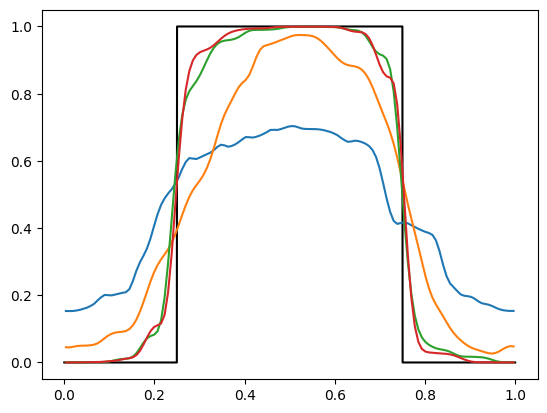

In [42]:
fig, axs = plt.subplots()

n = 128
p = 7
num_snapshots, snapshot_dt = 100, 1.0

high_res_solver = AdvectionSolver(
    n=(2048,),
    **problem_configs["square2d"],
)
high_res_solver.plot_slice(axs, y=0.5, color="black")

apriori_MD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a priori MD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["square2d"],
    **solver_config,
)
apriori_MD_solver.rkorder()
apriori_MD_solver.plot_slice(axs, y=0.5)

apriori_LD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a priori LD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["square2d"],
    **solver_config,
)
apriori_LD_solver.rkorder()
apriori_LD_solver.plot_slice(axs, y=0.5)

aposteriori_MD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a posteriori MD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["square2d"],
    **solver_config,
)
aposteriori_MD_solver.rkorder()
aposteriori_MD_solver.plot_slice(axs, y=0.5)

aposteriori_LD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a posteriori LD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["square2d"],
    **solver_config,
)
aposteriori_LD_solver.rkorder()
aposteriori_LD_solver.plot_slice(axs, y=0.5)

New solution instance...


100%|██████████| 6.283185307179586/6.283185307179586 [08:19]   



Wrote a solution up to t = 6.283185307179586 located at /scratch/gpfs/jp7427/data/disk_d_{'u': 0, 'trouble': 0}_(256,)_(-1, 1)_(-1, 1)_0_0.6283185307179586_10_vortex_0.8_8_g_T_T_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_T_1e-10_numpy_rk4_6.283185307179586.pkl

New solution instance...


100%|██████████| 6.283185307179586/6.283185307179586 [03:24]   



Wrote a solution up to t = 6.283185307179586 located at /scratch/gpfs/jp7427/data/disk_d_{'u': 0, 'trouble': 0}_(256,)_(-1, 1)_(-1, 1)_0_0.6283185307179586_10_vortex_0.8_8_t_T_T_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_6.283185307179586.pkl

New solution instance...


100%|██████████| 6.283185307179586/6.283185307179586 [03:30]   



Wrote a solution up to t = 6.283185307179586 located at /scratch/gpfs/jp7427/data/disk_d_{'u': 0, 'trouble': 0}_(256,)_(-1, 1)_(-1, 1)_0_0.6283185307179586_10_vortex_0.8_8_t_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_6.283185307179586.pkl

New solution instance...


100%|██████████| 6.283185307179586/6.283185307179586 [03:10]   



Wrote a solution up to t = 6.283185307179586 located at /scratch/gpfs/jp7427/data/disk_d_{'u': 0, 'trouble': 0}_(256,)_(-1, 1)_(-1, 1)_0_0.6283185307179586_10_vortex_0.8_8_t_F_F_T_PP_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_6.283185307179586.pkl



(-0.5, 0.5)

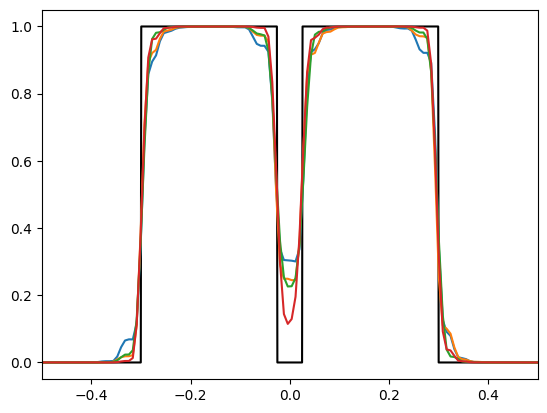

In [3]:
fig, axs = plt.subplots()

n = 256
p = 7
num_snapshots, snapshot_dt = 10, 2 * np.pi / 10

high_res_solver = AdvectionSolver(
    n=(2048,),
    **problem_configs["disk"],
)
high_res_solver.plot_slice(axs, y=0.5, color="black")

apriori_MD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a priori MD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["disk"],
    **solver_config,
)
apriori_MD_solver.rkorder()
apriori_MD_solver.plot_slice(axs, y=0.5)

apriori_LD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a priori LD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["disk"],
    **solver_config,
)
apriori_LD_solver.rkorder()
apriori_LD_solver.plot_slice(axs, y=0.5)

aposteriori_MD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a posteriori MD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["disk"],
    **solver_config,
)
aposteriori_MD_solver.rkorder()
aposteriori_MD_solver.plot_slice(axs, y=0.5)

aposteriori_LD_solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    **limiter_configs["a posteriori LD"],
    num_snapshots=num_snapshots,
    snapshot_dt=snapshot_dt,
    **problem_configs["disk"],
    **solver_config,
)
aposteriori_LD_solver.rkorder()
aposteriori_LD_solver.plot_slice(axs, y=0.5)

axs.set_xlim(-0.5, 0.5)